In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#ml libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

# preprocessing libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/cover.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)


In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


## Data Cleaning

In [4]:
features_with_na = [column for column in df.columns if df[column].isna().sum() >= 1]
for column in features_with_na:
    print(column, np.round(df[column].isnull().sum()*100, 5), "% of missing feautes")

In [5]:
df.duplicated().sum()

0

In [8]:
numeric_features = [column for column in df.columns if df[column].dtype != 'O']
print("Number of numeric features:", len(numeric_features))

Number of numeric features: 55


In [9]:
categorical_features = [column for column in df.columns if df[column].dtype == 'O']
print("Number of categorical features:", len(categorical_features))

Number of categorical features: 0


In [14]:
discrete_features = [column for column in df.columns if df[column].nunique() <= 25]
print("Number of discrete feautres:", len(discrete_features))

Number of discrete feautres: 45


In [15]:
continous_features = [column for column in df.columns if df[column].nunique() > 25]
print("Number of continous feautres:", len(continous_features))

Number of continous feautres: 10


### Outliers

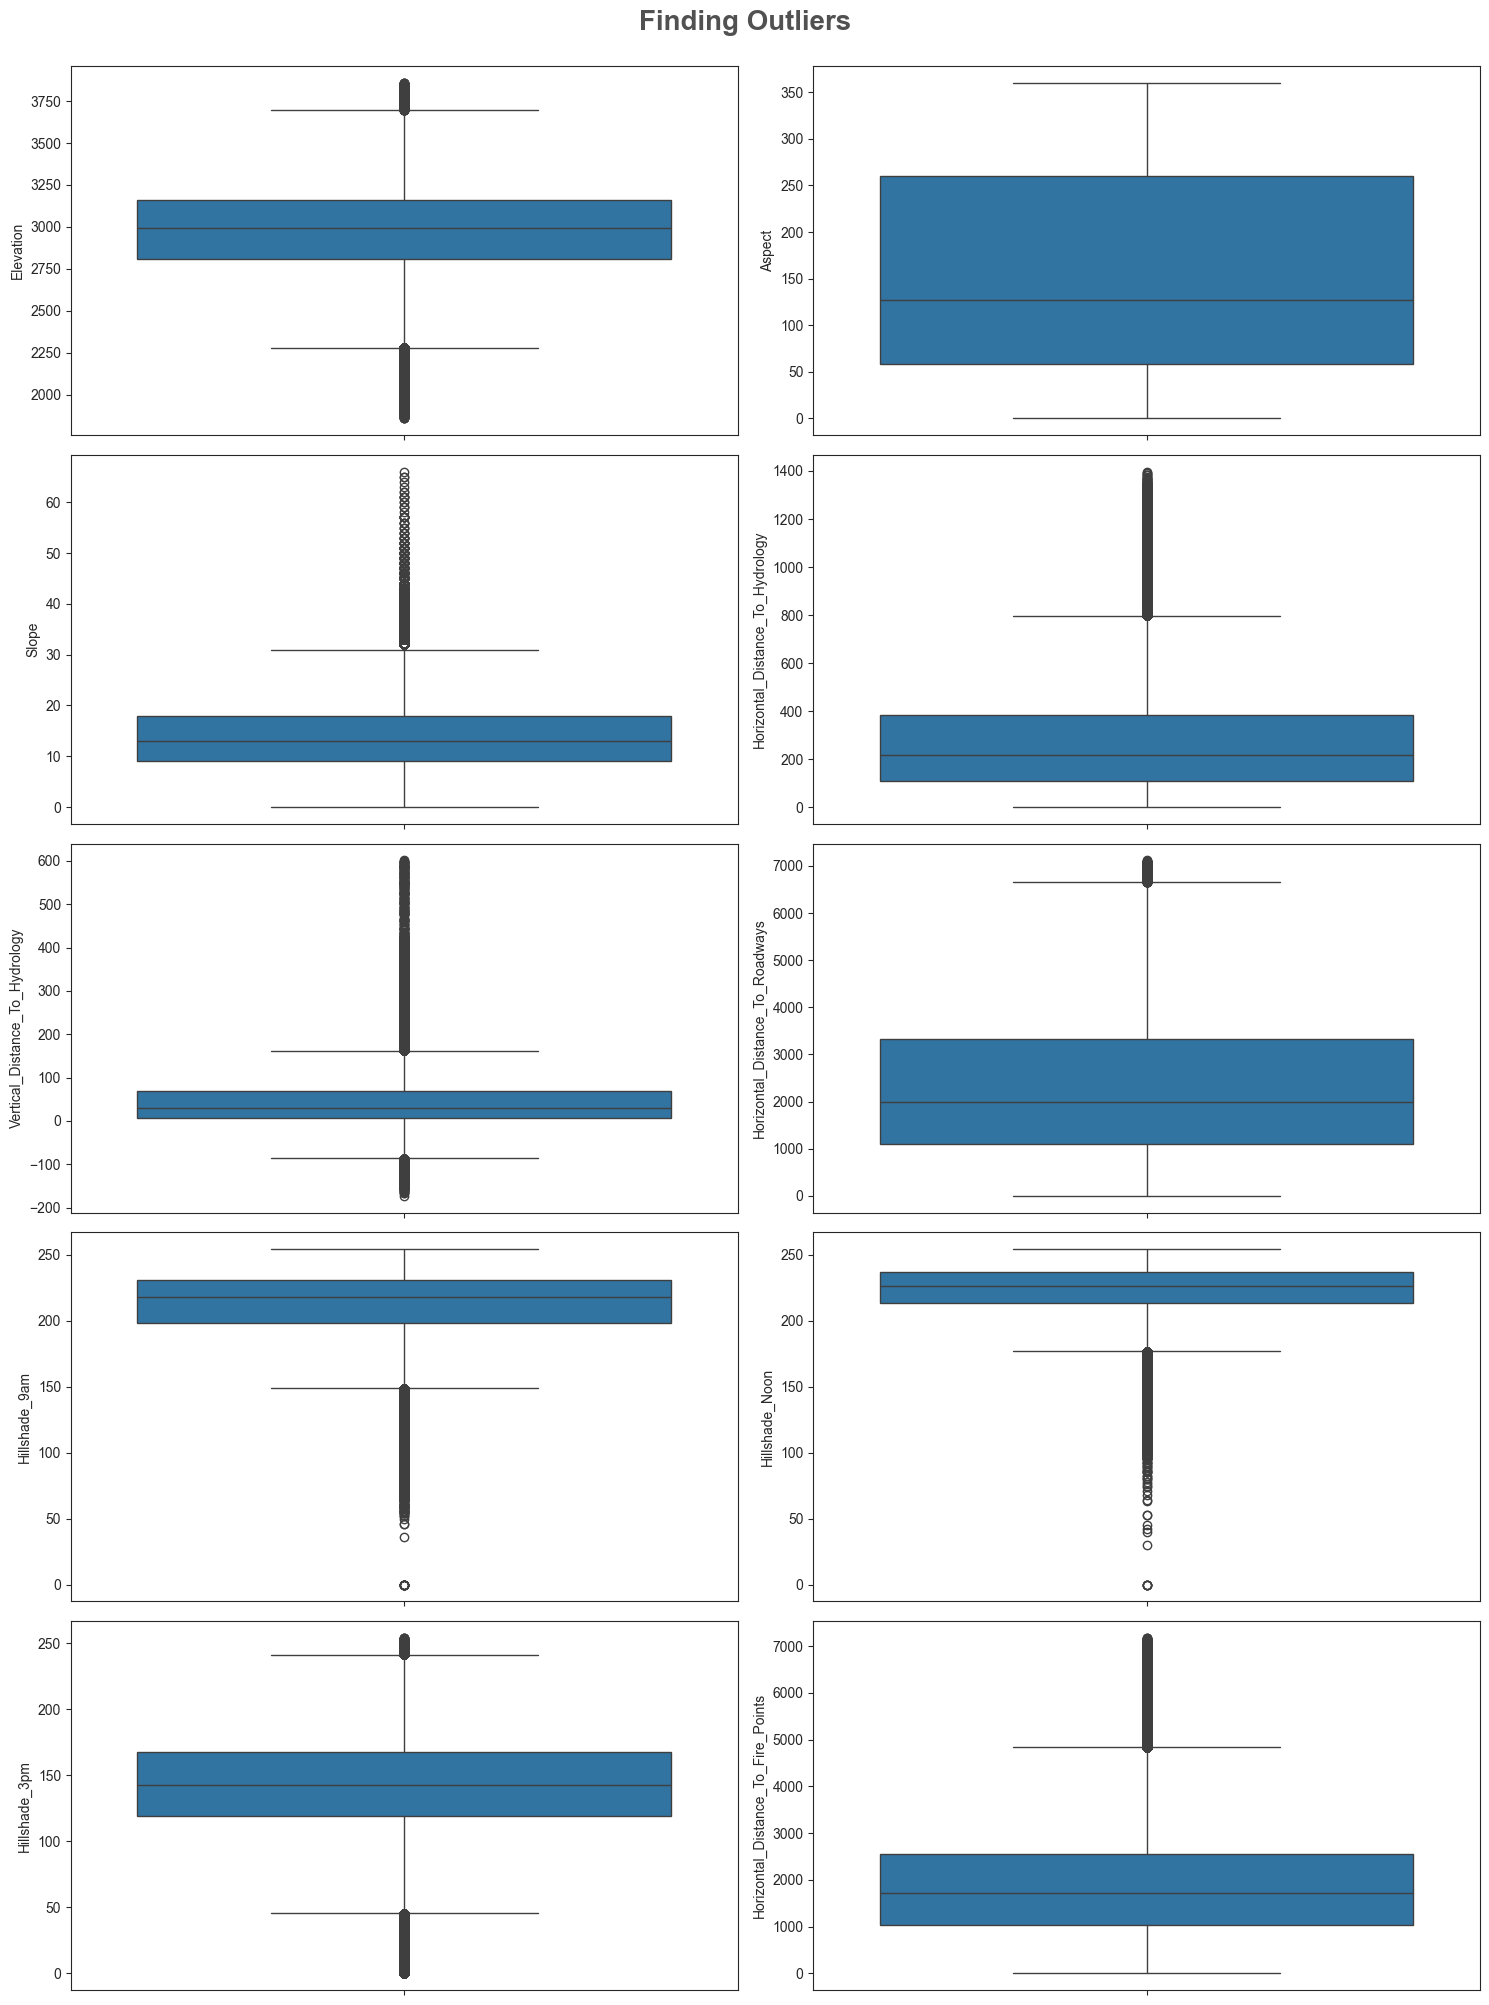

In [18]:
## Using IQR method and box plot

plt.figure(figsize=(15, 20))
plt.suptitle("Finding Outliers", fontsize=20, fontweight="bold", alpha=0.8, y=1.)
for idx, column in enumerate(continous_features):
    plt.subplot(5, 2, idx+1)
    sns.set_style("ticks")
    sns.boxplot(df[column])
    plt.tight_layout()


### Insights
* Apart from the feature *Aspect* everything else has outliers